In [1]:
import os
import pandas
import sys
import json
from io import StringIO, BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sciserver import config, authentication, loginportal, casjobs, skyquery, scidrive, skyserver

# Define login Name and password before running these examples
Authentication_loginName = 'testuser'
Authentication_loginPassword = 'testpass'

# Authentication:

In [2]:
# to get help on module or function
authentication?
# or
help(authentication)

Help on module sciserver.authentication in sciserver:

NAME
    sciserver.authentication

FILE
    /Users/Brian/Work/github_projects/SciScript-Python/python/sciserver/authentication.py

DESCRIPTION
    # !usr/bin/env python
    # -*- coding: utf-8 -*-
    #
    # Licensed under a 3-clause BSD license.
    #
    # @Author: Brian Cherinka
    # @Date:   2017-08-04 14:41:52
    # @Last modified by:   Brian Cherinka
    # @Last Modified time: 2017-08-10 08:34:27

CLASSES
    __builtin__.object
        KeystoneUser
        Token
    
    class KeystoneUser(__builtin__.object)
     |  The class KeystoneUser stores the 'id' and 'name' of the user.
     |  
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Data and other attributes defi

In [3]:
# logging in and getting current token from different ways
token1 = authentication.login(Authentication_loginName, Authentication_loginPassword);
token2 = authentication.getToken()
token3 = authentication.getKeystoneToken()
token4 = authentication.token.value
config.token = token2
print("token1=" + token1)
print("token2=" + token2)
print("token3=" + token3)
print("token4=" + token4)

token1=3aeb674cd3704c53b048959e136c33b2
token2=3aeb674cd3704c53b048959e136c33b2
token3=3aeb674cd3704c53b048959e136c33b2
token4=3aeb674cd3704c53b048959e136c33b2


/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using SciServer.Authentication.getKeystoneToken is deprecated.Use SciServer.Authentication.getToken instead.


In [4]:
# getting curent user info
user = authentication.getKeystoneUserWithToken(token1)
print("userName=" + user.userName)
print("id=" + user.userid)
iden = authentication.identArgIdentifier()
print("ident="+iden)

userName=testuser
id=8eb32dc414e94d329d07ba5c01fa9dcb
ident=--ident=


In [5]:
# reseting the current token to another value:
authentication.setToken("myToken1")
token5 = authentication.getToken()
authentication.setKeystoneToken("myToken2")
token6 = authentication.getKeystoneToken()

print("token5=" + token5)
print("token6=" + token6)

token5=myToken1
token6=myToken2


/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using SciServer.Authentication.setKeystoneToken is deprecated.Use SciServer.Authentication.setToken instead.
/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using SciServer.Authentication.getKeystoneToken is deprecated.Use SciServer.Authentication.getToken instead.


In [6]:
# logging-in again
token1 = authentication.login(Authentication_loginName, Authentication_loginPassword);


# LoginPortal:

In [7]:
# logging in and getting current token from different ways
token1 = loginportal.login(Authentication_loginName, Authentication_loginPassword);
token2 = loginportal.getToken()
token3 = loginportal.getKeystoneToken()
print("token1=" + token1)
print("token2=" + token2)
print("token3=" + token3)

token1=2a9dcda70875475f9de26b251f5b3437
token2=2a9dcda70875475f9de26b251f5b3437
token3=2a9dcda70875475f9de26b251f5b3437


/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using SciServer.LoginPortal.login is deprecated.Use auth.login instead.
  from ipykernel import kernelapp as app
/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using SciServer.LoginPortal.getToken is deprecated. Use auth.getToken instead.
  app.launch_new_instance()
/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using SciServer.LoginPortal.getKeystoneToken is deprecated. Use auth.getToken instead.


In [8]:
# getting curent user info
user = loginportal.getKeystoneUserWithToken(token1)
print("userName=" + user.userName)
print("id=" + user.userid)#
iden = loginportal.identArgIdentifier()
print("ident="+iden)#

userName=testuser
id=8eb32dc414e94d329d07ba5c01fa9dcb
ident=--ident=


/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using SciServer.LoginPortal.getKeystoneUserWithToken is deprecated. Use auth.getKeystoneUserWithToken instead.
  from ipykernel import kernelapp as app
/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using auth.identArgIdentifier is deprecated. Use auth.identArgIdentifier instead.


In [9]:
# reseting the current token to another value:
loginportal.setKeystoneToken("myToken2")
token6 = loginportal.getKeystoneToken()
print("token6=" + token6)

token6=myToken2


/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using SciServer.LoginPortal.getKeystoneToken is deprecated. Use auth.setToken instead.
  from ipykernel import kernelapp as app
/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using SciServer.LoginPortal.getKeystoneToken is deprecated. Use auth.getToken instead.
  app.launch_new_instance()


In [10]:
# logging-in again
token1 = loginportal.login(Authentication_loginName, Authentication_loginPassword);

/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using SciServer.LoginPortal.login is deprecated.Use auth.login instead.
  from ipykernel import kernelapp as app


# CasJobs:

In [11]:
# Defining databse context and query, and other variables
CasJobs_TestDatabase = "MyDB"
CasJobs_TestQuery = "select 4 as Column1, 5 as Column2 "
CasJobs_TestTableName1 = "MyNewtable1"
CasJobs_TestTableName2 = "MyNewtable2"
CasJobs_TestTableCSV = u"Column1,Column2\n4,5\n"
CasJobs_TestFitsFile = "SciScriptTestFile.fits"
CasJobs_TestCSVFile = "SciScriptTestFile.csv"

In [12]:
# get user schema info
casJobsId = casjobs.getSchemaName()
print(casJobsId)

wsid_1029563400


In [13]:
# get info about tables inside MyDB database context:
tables = casjobs.getTables(context="MyDB")
print(tables)

[{u'Date': 636379566662800000, u'Rows': 3, u'Name': u'QuickResults', u'Size': 208}]


In [14]:
# execute a quick SQL query:
df = casjobs.executeQuery(sql=CasJobs_TestQuery, context=CasJobs_TestDatabase, outformat="pandas")
print(df)

   Column1  Column2
0        4        5


In [15]:
# submit a job, which inserts the query results into a table in the MyDB database context. 
# Wait until the job is done and get its status.
jobId = casjobs.submitJob(sql=CasJobs_TestQuery + " into MyDB." + CasJobs_TestTableName1, context="MyDB")
jobDescription = casjobs.waitForJob(jobId=jobId, verbose=False)
print(jobId)
print(jobDescription)

30038003
{u'Status': 5, u'TimeStart': u'2017-08-10T10:13:26.843', u'Rows': 1, u'Target': u'MyDB', u'SendEmail': 0, u'Message': u'Query Complete', u'ModifiedQuery': u'select 4 as Column1, 5 as Column2  /*CASJOBS_INTO_TABLE:[sdss3q].mydb_1029563400.webuser.MyNewtable1*/', u'Created_Table': u'MyNewtable1', u'TimeEnd': u'2017-08-10T10:13:27', u'JobID': 30038003, u'WebServicesID': 1029563400, u'TimeSubmit': u'2017-08-10T10:13:25.737', u'Params': u'', u'HostIP': u'SQL001DBHost   ', u'Query': u'select 4 as Column1, 5 as Column2  into MyDB.MyNewtable1', u'Estimate': 500, u'OutputType': u'QUERY', u'TaskName': u'SciScript-Python.CasJobs.submitJob', u'OutputLoc': u'', u'AutoComplete': 0}


In [16]:
# drop or delete table in MyDB database context
df = casjobs.executeQuery(sql="DROP TABLE " + CasJobs_TestTableName1, context="MyDB", outformat="pandas")
print(df)

   Rows Affected
0              0


In [17]:
# get job status
jobId = casjobs.submitJob(sql=CasJobs_TestQuery, context=CasJobs_TestDatabase)
jobDescription = casjobs.getJobStatus(jobId)
print(jobId)
print(jobDescription)

30038006
{u'Status': 0, u'TimeStart': None, u'Rows': None, u'Target': u'MyDB', u'SendEmail': 0, u'Message': u'', u'ModifiedQuery': u'select 4 as Column1, 5 as Column2', u'Created_Table': u'', u'TimeEnd': None, u'JobID': 30038006, u'WebServicesID': 1029563400, u'TimeSubmit': u'2017-08-10T10:13:29.287', u'Params': u'', u'HostIP': u'               ', u'Query': u'select 4 as Column1, 5 as Column2 ', u'Estimate': 500, u'OutputType': u'QUERY', u'TaskName': u'SciScript-Python.CasJobs.submitJob', u'OutputLoc': u'', u'AutoComplete': 0}


In [18]:
# cancel a job
jobId = casjobs.submitJob(sql=CasJobs_TestQuery, context=CasJobs_TestDatabase)
jobDescription = casjobs.cancelJob(jobId=jobId)
print(jobId)
print(jobDescription)

30038007
True


In [19]:
# execute a query and write a local Fits file containing the query results:
result = casjobs.writeFitsFileFromQuery(fileName=CasJobs_TestFitsFile, queryString=CasJobs_TestQuery, context="MyDB")
print(result)

True


In [20]:
# delete local FITS file just created:
os.remove(CasJobs_TestFitsFile)

In [21]:
# get a Pandas dataframe containing the results of a query
df = casjobs.getPandasDataFrameFromQuery(queryString=CasJobs_TestQuery, context=CasJobs_TestDatabase)
print(df)

   Column1  Column2
0        4        5


In [22]:
# get numpy array containing the results of a query
array = casjobs.getNumpyArrayFromQuery(queryString=CasJobs_TestQuery, context=CasJobs_TestDatabase)
print(array)

[[4 5]]


In [23]:
# uploads a Pandas dataframe into a Database table
df = pandas.read_csv(StringIO(CasJobs_TestTableCSV), index_col=None)
result = casjobs.uploadPandasDataFrameToTable(dataFrame=df, tableName=CasJobs_TestTableName2, context="MyDB")
table = casjobs.executeQuery(sql="select * from " + CasJobs_TestTableName2, context="MyDB", outformat="pandas")
print(result)
print(table)

True
   Column1  Column2
0        4        5


In [24]:
# drop or delete table just created:
result2 = casjobs.executeQuery(sql="DROP TABLE " + CasJobs_TestTableName2, context=CasJobs_TestDatabase, outformat="pandas")
print(result2)

   Rows Affected
0              0


In [25]:
# upload csv data string into a database table:
result3 = casjobs.uploadCSVDataToTable(csvData=CasJobs_TestTableCSV, tableName=CasJobs_TestTableName2, context="MyDB")
df2 = casjobs.executeQuery(sql="select * from " + CasJobs_TestTableName2, context="MyDB", outformat="pandas")
print(result3)
print(df2)

True
   Column1  Column2
0        4        5


In [26]:
# drop or delete table just created:
result4 = casjobs.executeQuery(sql="DROP TABLE " + CasJobs_TestTableName2, context="MyDB", outformat="pandas")
print(result4)

   Rows Affected
0              0


# SkyServer:

In [27]:
# defining sql query and SDSS data relelease:
SkyServer_TestQuery = "select top 1 specobjid, ra, dec from specobj order by specobjid"
SkyServer_DataRelease = "DR13"

In [28]:
# Exectute sql query
df = skyserver.sqlSearch(sql=SkyServer_TestQuery, dataRelease=SkyServer_DataRelease)
print(df)

            specobjid         ra       dec
0  299489677444933632  146.71421 -1.041304


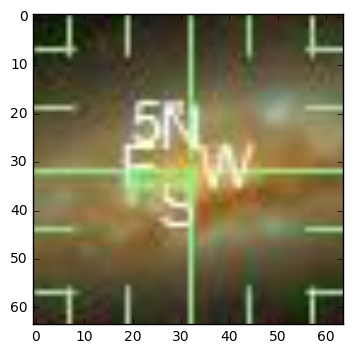

In [29]:
# get an image cutout
img = skyserver.getJpegImgCutout(ra=197.614455642896, dec=18.438168853724, width=2, height=2, scale=0.4, 
                                 dataRelease=SkyServer_DataRelease,opt="OG",
                                 query="SELECT TOP 100 p.objID, p.ra, p.dec, p.r FROM fGetObjFromRectEq(197.6,18.4,197.7,18.5) n, PhotoPrimary p WHERE n.objID=p.objID")
plt.imshow(img)

In [30]:
# do a radial search of objects:
df = skyserver.radialSearch(ra=258.25, dec=64.05, radius=0.1, dataRelease=SkyServer_DataRelease)
print(df)

                 objid   run  rerun  camcol  field  obj  type          ra  \
0  1237671939804561654  6162    301       3    133  246     3  258.250804   

         dec         u        g         r         i         z     Err_u  \
0  64.051445  23.33982  22.3194  21.41105  21.11971  20.84277  0.664019   

      Err_g    Err_r     Err_i     Err_z  
0  0.116986  0.07641  0.080523  0.238198  


In [31]:
# do rectangular search of objects:
df = skyserver.rectangularSearch(min_ra=258.3, max_ra=258.31, min_dec=64,max_dec=64.01, dataRelease=SkyServer_DataRelease)
print(df)

                 objid   run  rerun  camcol  field   obj  type          ra  \
0  1237671939804628290  6162    301       3    134  1346     6  258.304721   

         dec        u         g        r         i         z     Err_u  \
0  64.006203  25.0008  24.50057  22.4854  21.10345  20.14999  0.995208   

      Err_g     Err_r     Err_i     Err_z  
0  0.565456  0.166184  0.071836  0.124986  


In [32]:
# do an object search based on RA,Dec coordinates:
object = skyserver.objectSearch(ra=258.25, dec=64.05, dataRelease=SkyServer_DataRelease)
print(object)

[{u'Rows': [{u'specId': None, u'name': u'', u'apid': u'', u'objId': u'0x112d1812608500f6', u'specObjId': u'', u'id': 1237671939804561654}], u'TableName': u'objectInfo'}, {u'Rows': [{u'mjd': 53879, u'camcol': 3, u'run': 6162, u'specObjId': None, u'objid': 1237671939804561654, u'field': 133, u'otype': u'GALAXY', u'survey': u'', u'ra': 258.250803912329, u'clean': 0, u'rerun': 301, u'obj': 246, u'dec': 64.0514446092202, u'mode': 1}], u'TableName': u'MetaData'}, {u'Rows': [{u'parentID': 1237671939804561638, u'GalaxyZoo_Morph': u'-', u'nChild': 0, u'camcol': 3, u'mjdNum': 53879, u'otype': u'GALAXY', u'field': 133, u'ra': 258.250803912329, u'u': 23.33982, u'run': 6162, u'petrorad_r': u'     1.51 &plusmn      0.161', u'photoZ_KD': u'  0.369 &plusmn   0.1088', u'objId': u'0x112d1812608500f6', u'fieldId': u'0x112d181260850000', u'err_u': 0.6640186, u'Other observations': 1, u'z': 20.84277, u'g': 22.3194, u'err_r': 0.07641038, u'i': 21.11971, u'err_z': 0.2381976, u'err_g': 0.1169861, u'r': 21.411

# SciDrive:

In [33]:
# list content and metadata of top level directory in SciDrive
dirList = scidrive.directoryList("")
print(dirList)

{u'hash': u'wmGQtjL7xo3AYPaoT99wWA==', u'rev': 0, u'thumb_exists': False, u'bytes': 0, u'modified': u'Wed, 09 Aug 2017 13:33:11 -0400', u'items': 0, u'path': u'', u'is_dir': True, u'icon': u'folder_public', u'root': u'dropbox', u'contents': [], u'size': u'0 B'}


In [34]:
# define name of directory to be created in SciDrive:
SciDrive_Directory = "SciScriptPython"
# define name, path and content of a file to be first created and then uploaded into SciDrive:
SciDrive_FileName = "TestFile.csv"
SciDrive_FilePath = "./TestFile.csv"
SciDrive_FileContent = "Column1,Column2\n4.5,5.5\n"

In [35]:
# create a folder or container in SciDrive
responseCreate = scidrive.createContainer(SciDrive_Directory)
print(responseCreate)

True


In [36]:
# list content and metadata of directory in SciDrive
dirList = scidrive.directoryList(SciDrive_Directory)
print(dirList)

{u'hash': u'YFBGPUhsJX68/HAE5jL4fQ==', u'rev': 0, u'thumb_exists': False, u'bytes': 0, u'modified': u'Thu, 10 Aug 2017 10:13:46 -0400', u'items': 0, u'path': u'/SciScriptPython', u'is_dir': True, u'icon': u'folder_public', u'root': u'dropbox', u'contents': [], u'size': u'0 B'}


In [37]:
# get the public url to access the directory content in SciDrive
url = scidrive.publicUrl(SciDrive_Directory)
print(url)

https://www.scidrive.org/vospace-2.0/data/2f1e95f2-0d41-4f12-87c4-b1c6a87929b2


In [38]:
# Delete folder or container in SciDrive:
responseDelete = scidrive.delete(SciDrive_Directory)
print(responseDelete)

True


In [39]:
# create a local file:
file = open(SciDrive_FileName, "w")
file.write(SciDrive_FileContent)
file.close()

In [40]:
# uploading a file to SciDrive:
responseUpload = scidrive.upload(path=SciDrive_Directory + "/" + SciDrive_FileName, localFilePath=SciDrive_FilePath)
print(responseUpload)

{u'rev': 1, u'thumb_exists': False, u'bytes': 24, u'modified': u'Thu, 10 Aug 2017 10:13:49 -0400', u'path': u'/SciScriptPython/TestFile.csv', u'is_dir': False, u'icon': u'file', u'root': u'dropbox', u'mime_type': u'application/file', u'size': u'24 B'}


In [41]:
# download file:
stringio = scidrive.download(path=SciDrive_Directory + "/" + SciDrive_FileName, outformat="StringIO")
fileContent = stringio.read()
print(fileContent)

Column1,Column2
4.5,5.5



In [42]:
# upload string data:
responseUpload = scidrive.upload(path=SciDrive_Directory + "/" + SciDrive_FileName, data=SciDrive_FileContent)
fileContent = scidrive.download(path=SciDrive_Directory + "/" + SciDrive_FileName, outformat="text")
print(fileContent)

Column1,Column2
4.5,5.5



In [43]:
# delete folder in SciDrive:
responseDelete = scidrive.delete(SciDrive_Directory)
print(responseDelete)

True


In [44]:
# delete local file:
os.remove(SciDrive_FilePath)

# SkyQuery:

In [45]:
# list all databses or datasets available
datasets = skyquery.listAllDatasets()
print(datasets)

[{u'name': u'SDSSDR7', u'isMutable': False}, {u'name': u'MYDB', u'isMutable': True}, {u'name': u'PSCz', u'isMutable': False}, {u'name': u'FUSE', u'isMutable': False}, {u'name': u'TwoDF', u'isMutable': False}, {u'name': u'SDSSDR12', u'isMutable': False}, {u'name': u'TwoMASS', u'isMutable': False}, {u'name': u'TwoQZ', u'isMutable': False}, {u'name': u'MYSCRATCH', u'isMutable': True}, {u'name': u'SDSSDR13', u'isMutable': False}, {u'name': u'NDWFS', u'isMutable': False}, {u'name': u'DLS', u'isMutable': False}, {u'name': u'IRAS', u'isMutable': False}, {u'name': u'GALEX', u'isMutable': False}, {u'name': u'RC3', u'isMutable': False}, {u'name': u'USNOB', u'isMutable': False}, {u'name': u'AGC', u'isMutable': False}, {u'name': u'WISE', u'isMutable': False}, {u'name': u'NVSS', u'isMutable': False}]


In [46]:
# get info about the user's personal database or dataset
info = skyquery.getDatasetInfo("MyDB")
print(info)

{u'name': u'MYDB', u'isMutable': True}


In [47]:
# list tables inside dataset
tables = skyquery.listDatasetTables("MyDB")
print(tables)

[{u'name': u'webuser.QuickResults', u'summary': u'', u'example': u'', u'remarks': u'', u'class': u'', u'columns': [{u'name': u'Column2', u'dataType': u'decimal', u'summary': u'', u'remarks': u'', u'size': 16, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'Column1', u'dataType': u'decimal', u'summary': u'', u'remarks': u'', u'size': 16, u'class': u'', u'unit': u'', u'quantity': u''}]}]


In [48]:
# list available job queues
queueList = skyquery.listQueues()
print(queueList)

[{u'pendingJobCount': 0, u'name': u'Maintenance'}, {u'pendingJobCount': 0, u'name': u'Long'}, {u'pendingJobCount': 0, u'name': u'Quick'}]


In [49]:
# list available job queues and related info
quick = skyquery.getQueueInfo('quick')
long= skyquery.getQueueInfo('long')
print(quick)
print(long)

{u'pendingJobCount': 0, u'name': u'Quick'}
{u'pendingJobCount': 0, u'name': u'Long'}


In [50]:
# Define query
SkyQuery_Query = "select 4.5 as Column1, 5.5 as Column2"

In [51]:
# submit a query as a job
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="quick")
print(jobId)

2788efc1-120a-4862-83ac-2ee9075535b4


In [52]:
# get status of a submitted job
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="quick")
jobDescription = skyquery.getJobStatus(jobId=jobId)
print(jobDescription)

{u'status': u'waiting', u'hasError': False, u'name': u'testuser_17081010135799095', u'comments': u'', u'dateCreated': u'2017-08-10T10:13:57', u'queue': u'quick', u'query': u'select 4.5 as Column1, 5.5 as Column2', u'canCancel': True, u'guid': u'b56bec9f-0801-4f46-b978-03592e97cb08'}


In [54]:
# wait for a job to be finished and then get the status
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="quick")
jobDescription = skyquery.waitForJob(jobId=jobId, verbose=True)
print("jobDescription=")
print(jobDescription)

Waiting...Waiting...Waiting...Waiting...Waiting...Done!
jobDescription=
{u'status': u'completed', u'hasError': False, u'name': u'testuser_17081010141198516', u'comments': u'', u'dateCreated': u'2017-08-10T10:14:11', u'queue': u'quick', u'query': u'select 4.5 as Column1, 5.5 as Column2', u'output': u'MYDB:webuser.QuickResults', u'dateStarted': u'2017-08-10T10:14:15', u'canCancel': False, u'dateFinished': u'2017-08-10T10:14:16', u'guid': u'bbbdba2f-5092-4c7c-b1ad-cc17028edf7d'}


In [55]:
# cancel a job that is running, and then get its status
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="long")
isCanceled = skyquery.cancelJob(jobId)
print(isCanceled)
print("job status:")
print(skyquery.getJobStatus(jobId=jobId))

True
job status:
{u'status': u'canceled', u'hasError': False, u'name': u'testuser_17081010141956707', u'comments': u'', u'dateCreated': u'2017-08-10T10:14:19', u'queue': u'long', u'query': u'select 4.5 as Column1, 5.5 as Column2', u'canCancel': False, u'dateFinished': u'2017-08-10T10:14:19', u'guid': u'5c0c5dad-7b74-4feb-a9d2-e60180487ca3'}


In [56]:
# get list of jobs
quickJobsList = skyquery.listJobs('quick')
longJobsList = skyquery.listJobs('long')
print(quickJobsList)
print(longJobsList)

[{u'queryJob': {u'status': u'completed', u'hasError': False, u'name': u'testuser_17081010141198516', u'comments': u'', u'dateCreated': u'2017-08-10T10:14:11', u'queue': u'quick', u'query': u'select 4.5 as Column1, 5.5 as Column2', u'output': u'MYDB:webuser.QuickResults', u'dateStarted': u'2017-08-10T10:14:15', u'canCancel': False, u'dateFinished': u'2017-08-10T10:14:16', u'guid': u'bbbdba2f-5092-4c7c-b1ad-cc17028edf7d'}}, {u'queryJob': {u'status': u'completed', u'hasError': False, u'name': u'testuser_17081010135877545', u'comments': u'', u'dateCreated': u'2017-08-10T10:13:58', u'queue': u'quick', u'query': u'select 4.5 as Column1, 5.5 as Column2', u'output': u'MYDB:webuser.QuickResults', u'dateStarted': u'2017-08-10T10:14:00', u'canCancel': False, u'dateFinished': u'2017-08-10T10:14:00', u'guid': u'23df0902-672c-48eb-a72d-5183d029fa72'}}, {u'queryJob': {u'status': u'completed', u'hasError': False, u'name': u'testuser_17081010135799095', u'comments': u'', u'dateCreated': u'2017-08-10T10

In [57]:
# define csv table to be uploaded to into MyDB in SkyQuery
SkyQuery_TestTableName = "TestTable_SciScript_R"
SkyQuery_TestTableCSV = u"Column1,Column2\n4.5,5.5\n"

In [58]:
# uploading the csv table:
result = skyquery.uploadTable(uploadData=SkyQuery_TestTableCSV, tableName=SkyQuery_TestTableName, datasetName="MyDB", informat="csv")
print(result)

True


In [59]:
# downloading table:
table = skyquery.getTable(tableName=SkyQuery_TestTableName, datasetName="MyDB", top=10)
print(table)

   #ID  Column1  Column2
0    1      4.5      5.5


In [60]:
# list tables inside dataset
tables = skyquery.listDatasetTables("MyDB")
print(tables)

[{u'name': u'webuser.TestTable_SciScript_R', u'summary': u'', u'example': u'', u'remarks': u'', u'class': u'', u'columns': [{u'name': u'Column2', u'dataType': u'float', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'ID', u'dataType': u'bigint', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'Column1', u'dataType': u'float', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}]}, {u'name': u'webuser.QuickResults', u'summary': u'', u'example': u'', u'remarks': u'', u'class': u'', u'columns': [{u'name': u'Column2', u'dataType': u'decimal', u'summary': u'', u'remarks': u'', u'size': 16, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'Column1', u'dataType': u'decimal', u'summary': u'', u'remarks': u'', u'size': 16, u'class': u'', u'unit': u'', u'quantity': u''}]}]


In [61]:
# get dataset table info:
info = skyquery.getTableInfo(tableName="webuser." + SkyQuery_TestTableName, datasetName="MyDB")
print(info)

{u'name': u'webuser.TestTable_SciScript_R', u'summary': u'', u'example': u'', u'remarks': u'', u'class': u'', u'columns': [{u'name': u'Column2', u'dataType': u'float', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'ID', u'dataType': u'bigint', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'Column1', u'dataType': u'float', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}]}


In [62]:
# get dataset table columns info
columns = skyquery.listTableColumns(tableName="webuser." + SkyQuery_TestTableName, datasetName="MyDB")
print(columns)

[{u'name': u'Column2', u'dataType': u'float', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'ID', u'dataType': u'bigint', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}, {u'name': u'Column1', u'dataType': u'float', u'summary': u'', u'remarks': u'', u'size': 8, u'class': u'', u'unit': u'', u'quantity': u''}]


In [63]:
# drop (or delete) table from dataset.
result = skyquery.dropTable(tableName=SkyQuery_TestTableName, datasetName="MyDB");
print(result)

True
